<h2>TITANIC DATASET<h2>

https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb

In [1]:
import numpy as np
import pandas as pd
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


PassengerId: Unique identification of the passenger. It shouldn't be necessary for the machine learning model.

Survived: Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

Name: Name of the passenger.

Sex: Sex / Gender.

Age: Age in years.

SibSp: # of siblings / spouses aboard the Titanic.

Parch: # of parents / children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number. It needs to be parsed.

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [3]:
df_titanic.drop(df_titanic.index[[1]], inplace=True)
# drop unnecessary columns
df_titanic.drop(columns=['ticket', 'fare', 'boat', 'body', 'home.dest'], inplace=True)

In [4]:
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48,0,0,E12,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,?,C
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,?,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,?,C
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,?,C


In [5]:
df_titanic['Survival'] = np.where(df_titanic['survived']!= 0, "Not Survived", "Survived")

In [6]:
df_titanic.Survival.head()

0    Not Survived
2        Survived
3        Survived
4        Survived
5    Not Survived
Name: Survival, dtype: object

In [7]:
# checking the missing values
df_titanic.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
cabin       0
embarked    0
Survival    0
dtype: int64

In [8]:
# replacing '?' data with nan
df_titanic.replace('?', np.nan, inplace=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

0    809
1    499
Name: survived, dtype: int64


Text(0.5, 1.0, 'Survival Numbers (1 = Survived)')

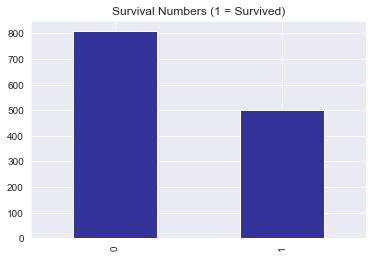

In [10]:
# find out how many people survived (1 = Survived, 0 = Not Survived)
print(df_titanic.survived.value_counts())

# bar plot
sns.set_style('darkgrid')
df_titanic.survived.value_counts().plot(kind='bar', cmap='terrain')
plt.title("Survival Numbers (1 = Survived)")

Text(0.5, 1.0, 'Percentage of Survived Passengers')

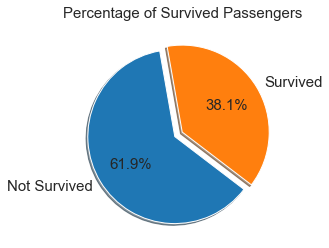

In [11]:
#Percentage (Pie Chart)
labels = ['Not Survived', 'Survived']
explode = (0.1,0)
plt.pie(df_titanic['survived'].value_counts(normalize=True), labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=100, textprops={"fontsize":15});
plt.title('Percentage of Survived Passengers', fontsize=15)

D:\Miniconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


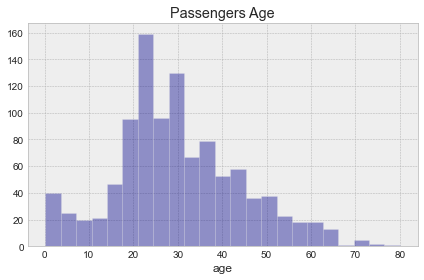

In [12]:
# Find out Passengers' Age

plt.style.use('bmh')
# Checking Passengers Age distribution
plt.title("Passengers Age")
sns.distplot(df_titanic.age, kde=False, color='darkblue')


plt.tight_layout()

male      842
female    466
Name: sex, dtype: int64


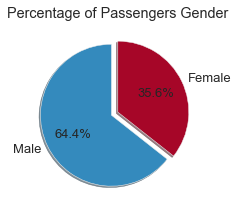

In [13]:
# Find out passengers GENDER
print(df_titanic['sex'].value_counts())
plt.figure(figsize=(10,3))

#Percentage (Pie Chart)
labels = ['Male', 'Female']
explode = (0.1,0)
plt.pie(df_titanic['sex'].value_counts(normalize=True), labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90, textprops={"fontsize":13});
plt.title('Percentage of Passengers Gender')

plt.tight_layout()

<AxesSubplot:title={'center':'Passengers Gender by Number'}, xlabel='sex', ylabel='count'>

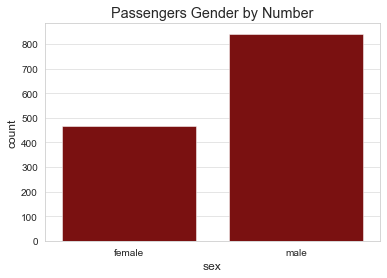

In [14]:
# Bar plot
sns.set_style('whitegrid')
plt.title("Passengers Gender by Number")
sns.countplot(x="sex", data=df_titanic, color='darkred')

3    709
1    322
2    277
Name: pclass, dtype: int64


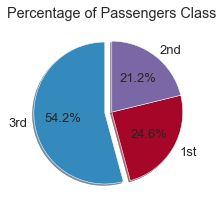

In [15]:
# Find out passengers CLASS
print(df_titanic['pclass'].value_counts())

plt.figure(figsize=(10,3))

#Percentage (Pie Chart)
labels = ['3rd','1st','2nd']
explode = (0.1,0,0)
plt.pie(df_titanic['pclass'].value_counts(normalize=True), labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90, textprops={"fontsize":13});
plt.title('Percentage of Passengers Class')

plt.tight_layout()

<AxesSubplot:title={'center':'Passengers Port of Embarkation by Number'}, xlabel='embarked', ylabel='count'>

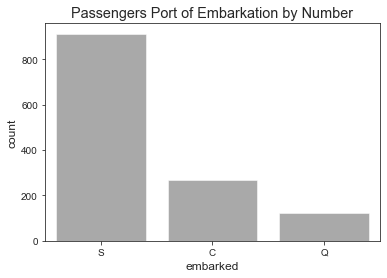

In [16]:
# Port of Embarkation
sns.set_style('ticks')
plt.title("Passengers Port of Embarkation by Number")
colors = ['#66b3ff','#99ff99','#ffcc99']
sns.countplot(x="embarked", data=df_titanic, color='darkgrey')

In [17]:
df_titanic.embarked.value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

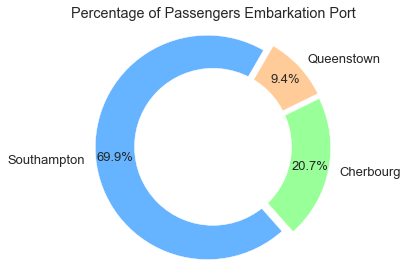

In [18]:
#Percentage (Donut chart)
labels = ['Southampton','Cherbourg','Queenstown']
explode = (0.05,0.05,0.05)
colors = ['#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
plt.pie(df_titanic['embarked'].value_counts(normalize=True), labels=labels, explode=explode, autopct='%1.1f%%', colors=colors, startangle=60, pctdistance=0.83, textprops={"fontsize":13});
centre_circle = plt.Circle((0,0),0.7,fc='white')

#Draw Circle (for make donut)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Passengers Embarkation Port')
ax1.axis('equal') 

plt.tight_layout()

<h3>Find out Survival Distribution<h3>

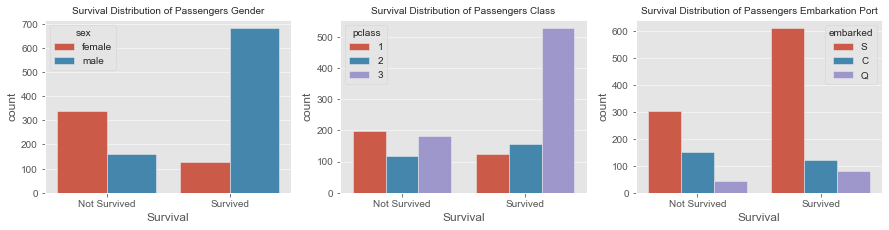

<Figure size 1080x504 with 0 Axes>

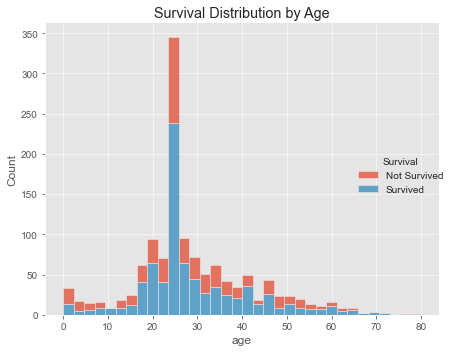

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))

# Distribution by Sex
plt.subplot(2,3,1)
sns.countplot(x="Survival", hue="sex", data=df_titanic)
plt.title('Survival Distribution of Passengers Gender', fontsize=10)

# Distribution by PClass
plt.subplot(2,3,2)
sns.countplot(x="Survival", hue="pclass", data=df_titanic)
plt.title('Survival Distribution of Passengers Class', fontsize=10)

# Distribution by Port of Embarkation
plt.subplot(2,3,3)
plt.title("Survival Distribution of Passengers Embarkation Port", fontsize=10)
sns.countplot(x="Survival", hue="embarked", data=df_titanic)

#Distribution by Age
# Assume that nan values are mean of passengers age (24 y.o)
df_titanic['age'] = df_titanic['age'].fillna(24)
df_titanic['age'] = df_titanic['age'].apply(lambda x: float(x))
df_titanic['age'].apply(np.ceil)
df_titanic['age'] = df_titanic['age'].astype(int)

#plt.subplot(2,1,2)
plt.figure(figsize=(15,7))
sns.displot(df_titanic,x='age', hue='Survival', multiple='stack')
plt.title("Survival Distribution by Age")
plt.tight_layout()